# 패키지 로딩

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
import warnings
import sidetable

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 1000)

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

ModuleNotFoundError: No module named 'sidetable'

# 파일불러오기, 인덱싱

In [2]:
d1 = pd.read_csv('data_all1.csv', encoding='cp949')
d1re = d1[['공정명', '생산량', '날짜', '시간', '전류.A.', '전압.V.',
           '가스.l.min.', '용접시간.sec.', '판단', '팁누적개수', 'NUM.EA.', '모델명']]
d1re.columns = ['공정명', '생산량', '날짜', '시간', '전류', '전압',
                '가스_l_min', '용접시간_sec', '판단', '팁누적개수', 'NUM_EA', '모델명']
d1re['시간'] = d1re['날짜'].astype(str) + ' ' + d1re['시간'].astype(str)
d1re['시간'] = d1re['시간'].astype('datetime64')
d1re.drop('날짜', inplace=True, axis=1)

d2 = pd.read_csv('data_all2.csv', encoding='cp949')
d2re = d2[['공정명', '생산량', '날짜', '시간', '전류.A.', '전압.V.',
           '가스.l.min.', '용접시간.sec.', '판단', '팁누적개수', 'NUM.EA.', '모델명']]
d2re.columns = ['공정명', '생산량', '날짜', '시간', '전류', '전압',
                '가스_l_min', '용접시간_sec', '판단', '팁누적개수', 'NUM_EA', '모델명']
d2re['시간'] = d2re['날짜'].astype(str) + ' ' + d2re['시간'].astype(str)
d2re['시간'] = d2re['시간'].astype('datetime64')
d2re.drop('날짜', inplace=True, axis=1)

d1re = d1re.sort_values(by='시간')
d1re.reset_index(inplace=True)
d2re = d2re.sort_values(by='시간')
d2re.reset_index(inplace=True)

d1re_1 = d1re[d1re['공정명'] == 'PLASMA W/D 1호기']
d1re_2 = d1re[d1re['공정명'] == 'PLASMA W/D 2호기']

d2re_2 = d2re[d2re['공정명'] == 'PLASMA 2호기']
d2re_3 = d2re[d2re['공정명'] == 'PLASMA 3호기']
d2re_11 = d2re[d2re['공정명'] == 'PLASMA 11호기']

d1re_good = d1re[d1re['판단'] == 'GOOD']
d1re_ngood = d1re[d1re['판단'] != 'GOOD']

d2re_good = d2re[d2re['판단'] == 'GOOD']
d2re_ngood = d2re[d2re['판단'] != 'GOOD']

/var/folders/t3/8bx5rvjs107d7mk1_w710tkh0000gn/T/ipykernel_5821/639620662.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d1re['시간'] = d1re['날짜'].astype(str) + ' ' + d1re['시간'].astype(str)
/var/folders/t3/8bx5rvjs107d7mk1_w710tkh0000gn/T/ipykernel_5821/639620662.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d1re['시간'] = d1re['시간'].astype('datetime64')
/var/folders/t3/8bx5rvjs107d7mk1_w710tkh0000gn/T/ipykernel_5821/639620662.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

# 시계열 정상성 변환

In [31]:
# 인덱싱

d1re_1.set_index('시간', inplace=True)
d1re_1.drop(['index', '공정명', '생산량', '판단', '팁누적개수',
            'NUM_EA', '모델명'], axis=1, inplace=True)
d1re_1

,전류,전압,가스_l_min,용접시간_sec
시간,,,,
2021-02-04 11:11:57,49.4,22.32,6.11,7.0
2021-02-04 11:12:15,49.3,22.19,6.09,7.0
2021-02-04 11:12:41,49.4,22.25,6.10,6.9
2021-02-04 11:13:00,49.3,22.16,6.10,7.0
2021-02-04 11:13:15,49.3,22.23,6.12,7.0
...,...,...,...,...
2022-03-29 09:59:56,52.4,23.73,6.35,6.0
2022-03-29 10:00:11,52.4,23.80,6.35,6.0
2022-03-29 10:00:26,52.4,23.81,6.35,6.0


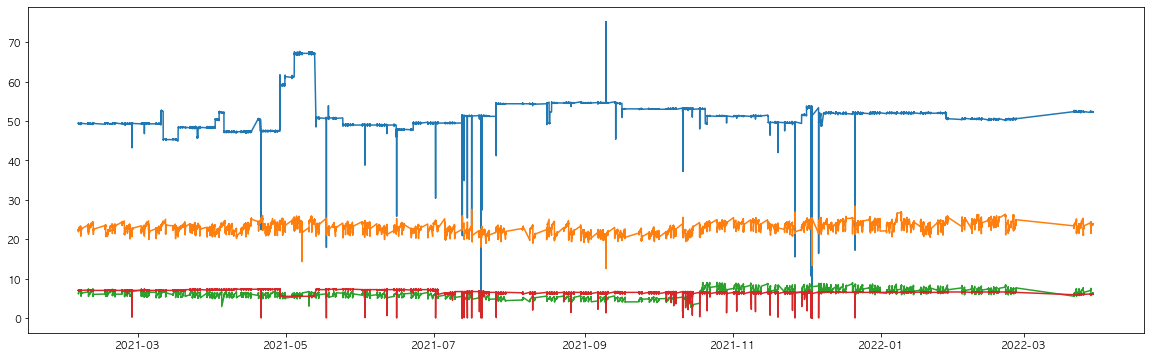

In [5]:
# 그래프 확인

plt.figure(figsize=(20, 6))
plt.plot(d1re_1)
plt.show()

## 로그변환

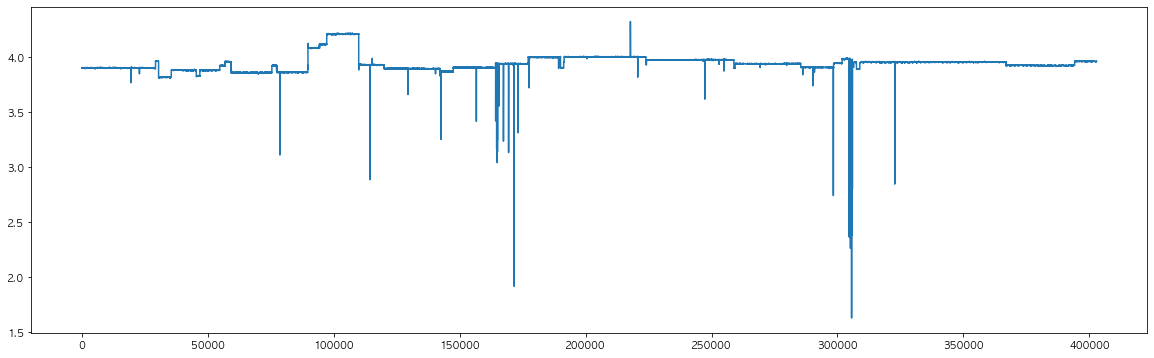

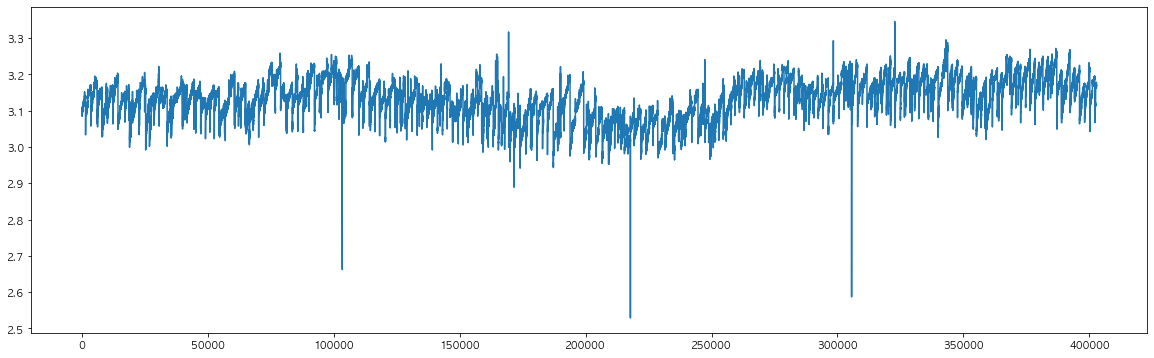

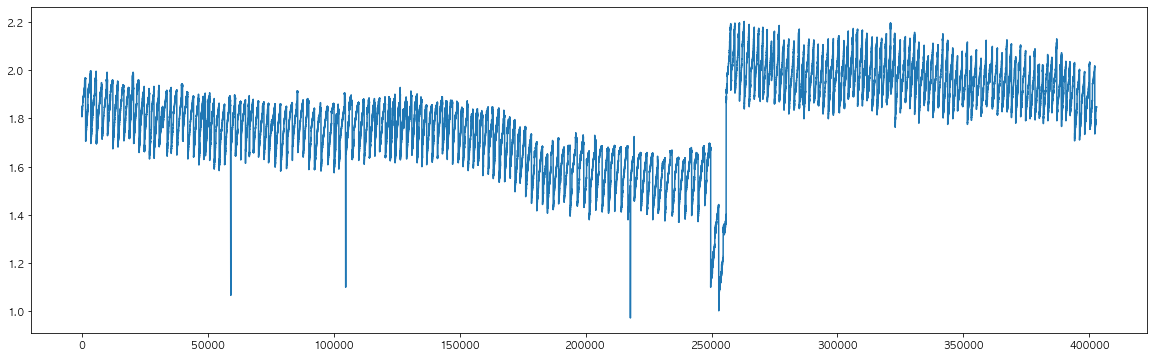

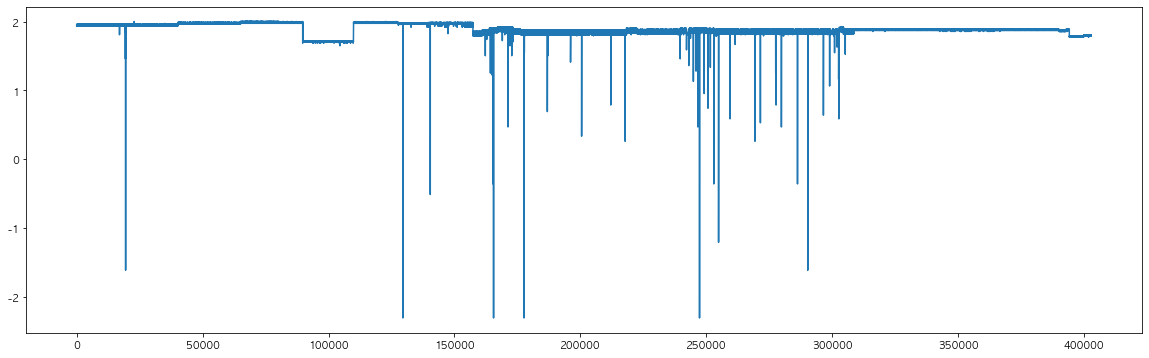

In [6]:
# 로그함수

list = ['A', 'V', 'G', 'T']
for i in range(0, d1re_1.shape[1]):
    globals()['d1re_1_' + list[i]] = np.log(d1re_1.iloc[:, i].values)
    plt.figure(figsize=(20, 6))
    plt.plot(globals()['d1re_1_' + list[i]])
    plt.show()

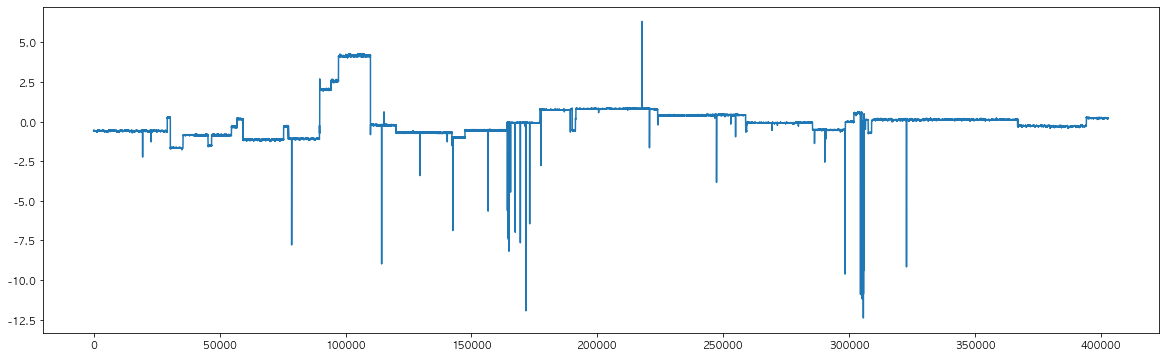

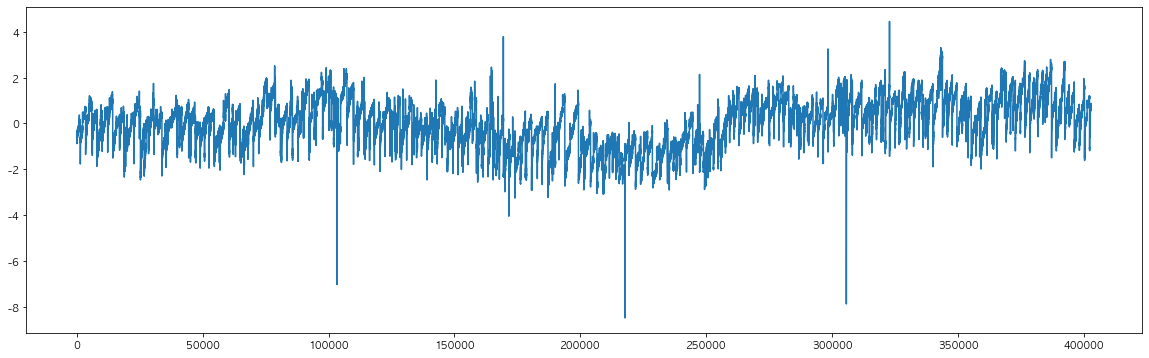

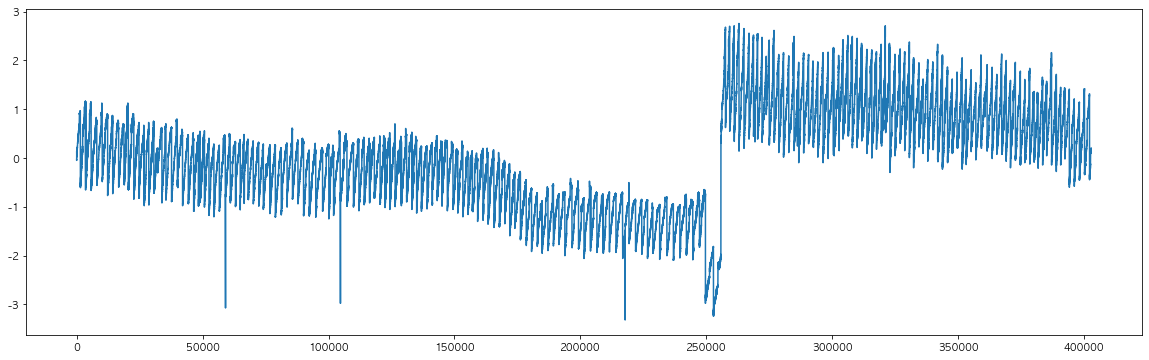

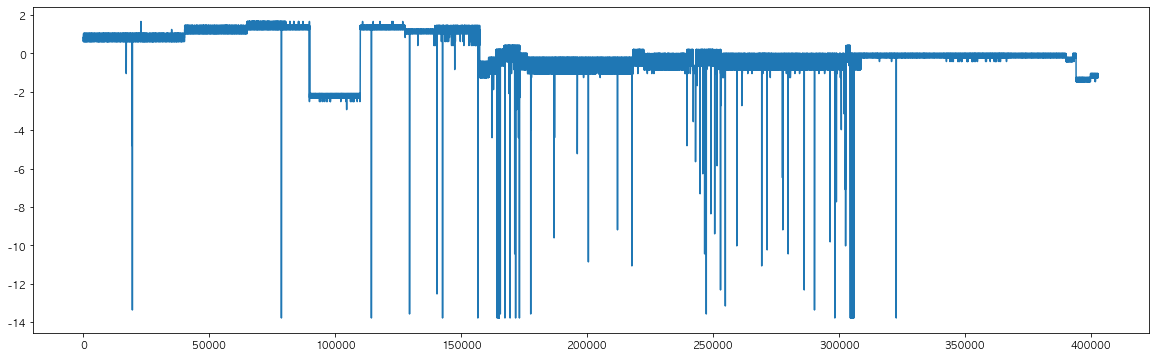

In [7]:
# 스케일링

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

for i in range(0, d1re_1.shape[1]):
    globals()['d1re_1_' + list[i]
              ] = scaler.fit_transform(d1re_1.iloc[:, i].values.reshape(-1, 1))
    plt.figure(figsize=(20, 6))
    plt.plot(globals()['d1re_1_' + list[i]])
    plt.show()

## 차분

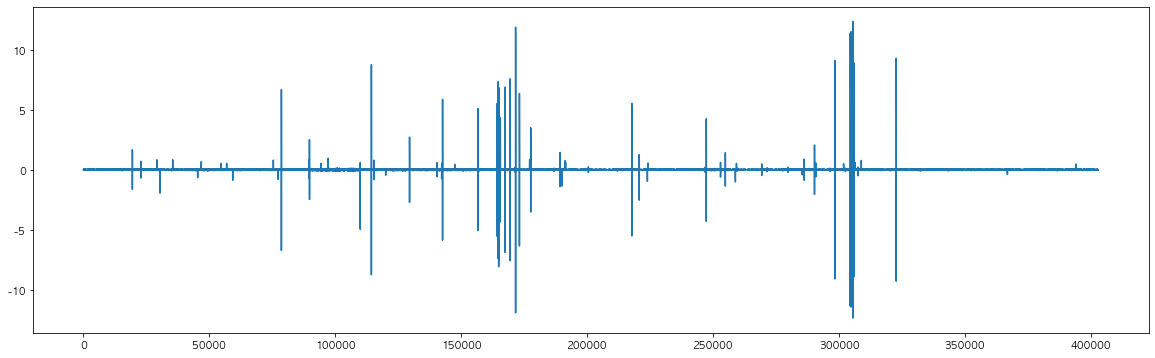

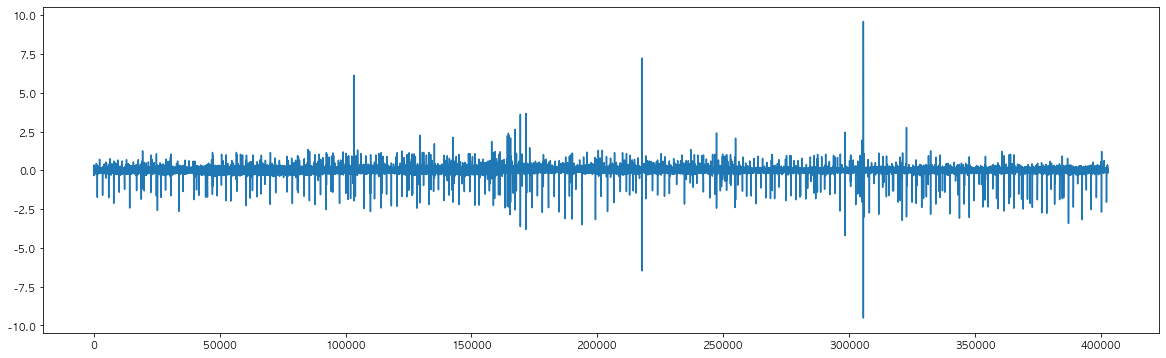

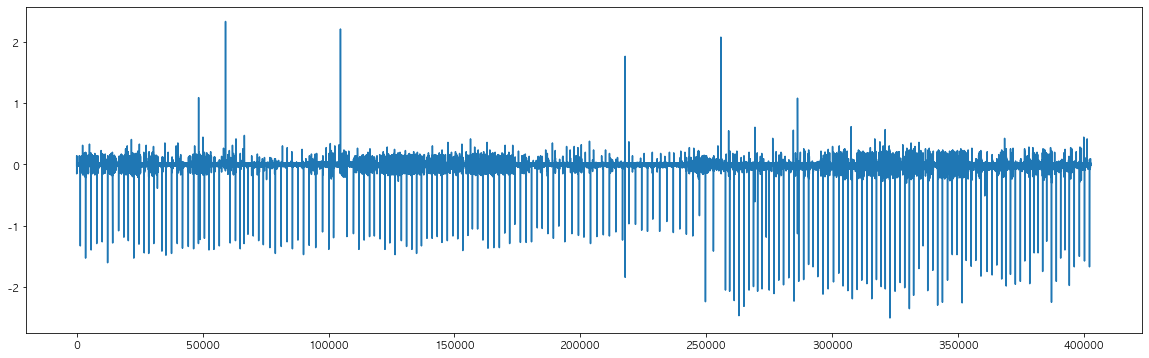

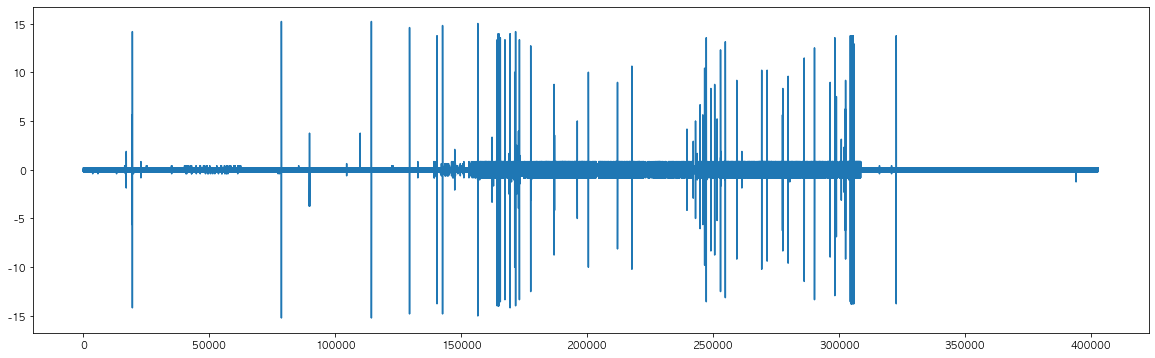

In [30]:
L = [d1re_1_A, d1re_1_V, d1re_1_G, d1re_1_T]
temp_df = pd.DataFrame()

for i in range(0, len(L)):
    temp_df = pd.concat([temp_df, pd.DataFrame(L[i]).diff()], axis=1)
    plt.figure(figsize=(20, 6))
    plt.plot(pd.DataFrame(L[i]).diff())
    plt.show()

temp_df.columns = list

## 차분한 데이터 plot sensor

In [45]:
temp_df['판단'].value_counts()

GOOD              389066
NG_(A)(Tip)         7962
NG_(Tip)            5730
NG_(T)(Tip)           77
NG_(A)(V)(Tip)         5
NG_(V)(Tip)            1
Name: 판단, dtype: int64

In [44]:
# 판단 컬럼 갖고오기 위해 재가공

d1 = pd.read_csv('data_all1.csv', encoding='cp949')
d1re = d1[['공정명', '생산량', '날짜', '시간', '전류.A.', '전압.V.',
           '가스.l.min.', '용접시간.sec.', '판단', '팁누적개수', 'NUM.EA.', '모델명']]
d1re.columns = ['공정명', '생산량', '날짜', '시간', '전류', '전압',
                '가스_l_min', '용접시간_sec', '판단', '팁누적개수', 'NUM_EA', '모델명']
d1re['시간'] = d1re['날짜'].astype(str) + ' ' + d1re['시간'].astype(str)
d1re['시간'] = d1re['시간'].astype('datetime64')
d1re.drop('날짜', inplace=True, axis=1)

d1re = d1re.sort_values(by='시간')
d1re.reset_index(inplace=True)

d1re_1 = d1re[d1re['공정명'] == 'PLASMA W/D 1호기']
d1re_1.reset_index(inplace=True)

# 판단 컬럼 만들어주기

temp_df['판단'] = d1re_1['판단']
temp_df

,A,V,G,T,판단
0,NaN,NaN,NaN,NaN,GOOD
1,-0.026674,-0.106111,-0.018957,0.000000,GOOD
2,0.026674,0.048974,0.009479,-0.208689,GOOD
3,-0.026674,-0.073461,0.000000,0.208689,GOOD
4,0.000000,0.057136,0.018957,0.000000,GOOD
...,...,...,...,...,...
402836,0.000000,-0.106111,0.009479,0.000000,GOOD
402837,0.000000,0.057136,0.000000,0.000000,GOOD
402838,0.000000,0.008162,0.000000,0.000000,GOOD
402839,0.000000,-0.024487,0.000000,0.000000,GOOD


In [108]:
def plot_sensor(temp_df, var_name, whaterror):
    fig = plt.figure(figsize=(30, 10))
    ax = plt.subplot(111)

    labels = temp_df['판단'].values.tolist()
    dates = temp_df.index  # temp_df는 시간순으로 인덱스까지 정렬되어 있어야함

    temp_df[var_name].plot(ax=ax)
    ax.legend([var_name], loc='upper right')

    temp_start = dates[0]  # 인덱스 0번에서부터 시작
    temp_date = dates[0]  # dates 0번에서 시작
    temp_label = labels[0]  # 라벌 또한 0번에서 시작

    for xc, value in zip(dates, labels):
        if whaterror == 'A':
            if temp_label != value:
                if temp_label == 'NG_(A)(Tip)':
                    ax.axvspan(temp_start, temp_date, alpha=0.2, color='red')
                if temp_label == 'NG_(A)(V)(Tip)':
                    ax.axvspan(temp_start, temp_date,
                               alpha=0.2, color='yellow')
                temp_start = xc
                temp_label = value
            temp_date = xc
        if whaterror == 'V':
            if temp_label != value:
                if temp_label == 'NG_(V)(Tip)':
                    ax.axvspan(temp_start, temp_date, alpha=0.2, color='cyan')
                temp_start = xc
                temp_label = value
            temp_date = xc
        if whaterror == 'T':
            if temp_label != value:
                if temp_label == 'NG_(T)(Tip)':
                    ax.axvspan(temp_start, temp_date, alpha=0.2, color='green')
                temp_start = xc
                temp_label = value
            temp_date = xc
        if whaterror == 'N':
            if temp_label != value:
                if temp_label == 'NG_(Tip)':
                    ax.axvspan(temp_start, temp_date, alpha=0.2, color='black')
                temp_start = xc
                temp_label = value
            temp_date = xc
        if whaterror == 'all':
            if temp_label != value:
                if temp_label == "NG_(T)(Tip)":
                    ax.axvspan(temp_start, temp_date, alpha=0.2, color='green')
                if temp_label == "NG_(Tip)":
                    ax.axvspan(temp_start, temp_date, alpha=0.2, color='black')
                if temp_label == 'NG_(A)(Tip)':
                    ax.axvspan(temp_start, temp_date, alpha=0.2, color='red')
                if temp_label == 'NG_(A)(V)(Tip)':
                    ax.axvspan(temp_start, temp_date,
                               alpha=0.2, color='yellow')
                if temp_label == 'NG_(V)(Tip)':
                    ax.axvspan(temp_start, temp_date, alpha=0.2, color='cyan')
                temp_start = xc
                temp_label = value
            temp_date = xc

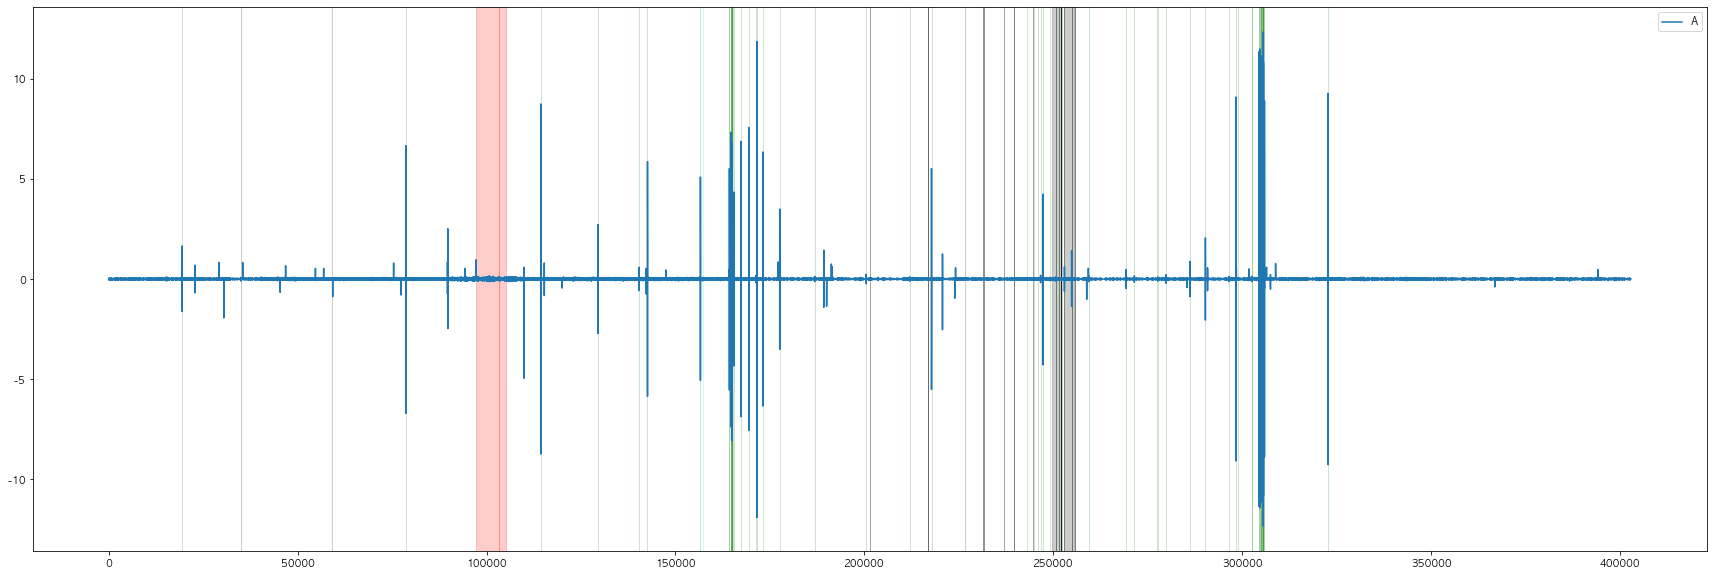

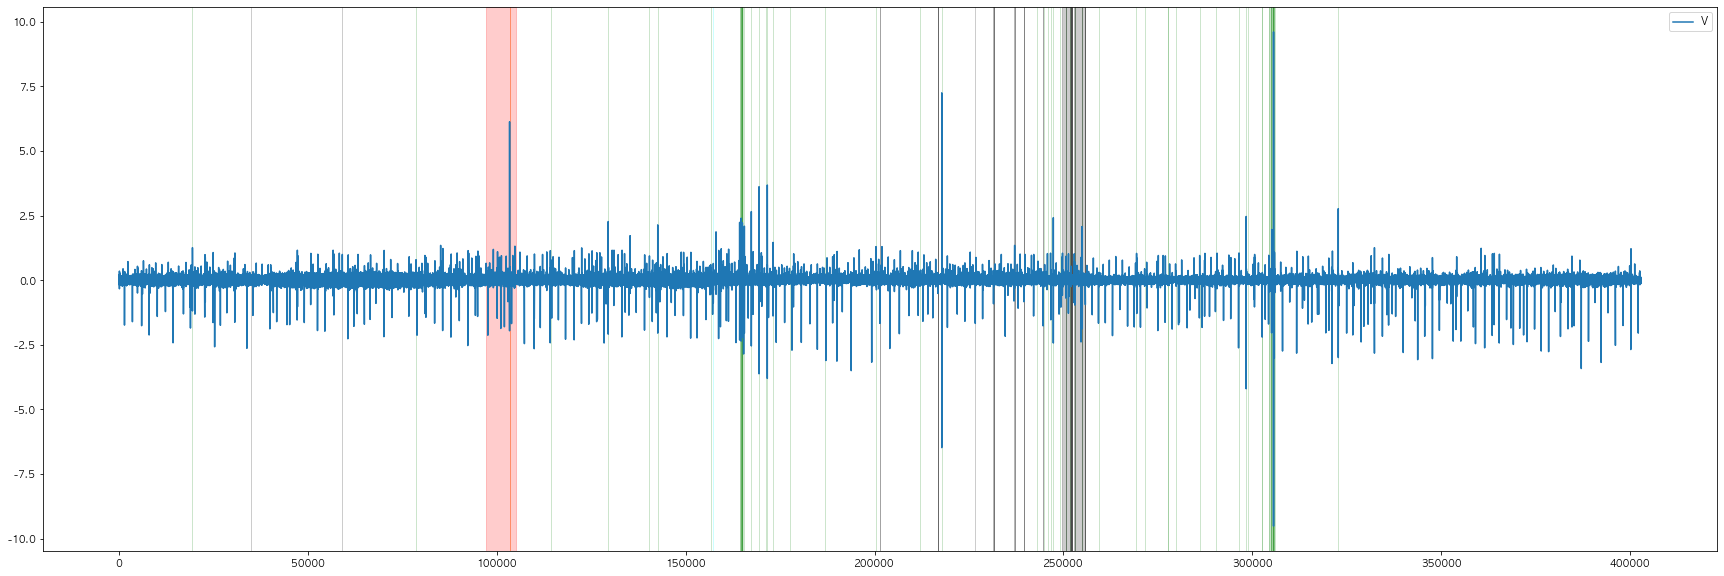

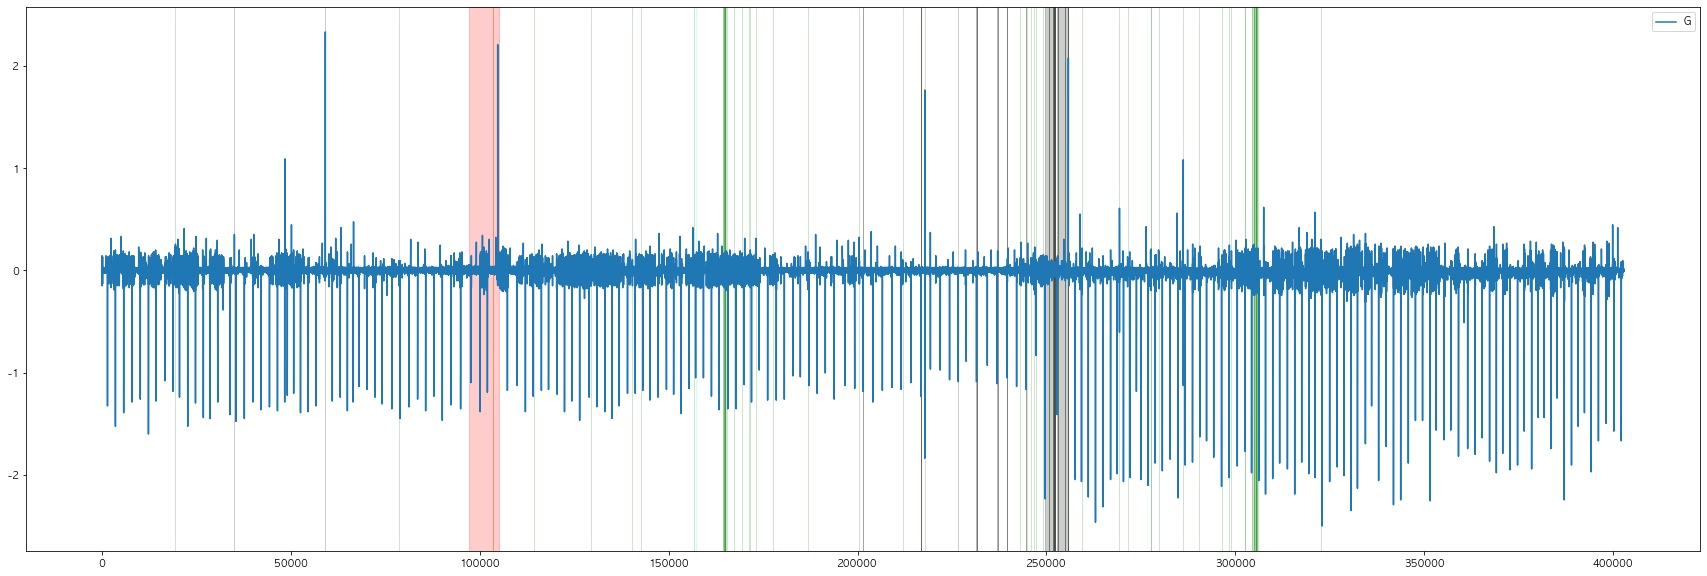

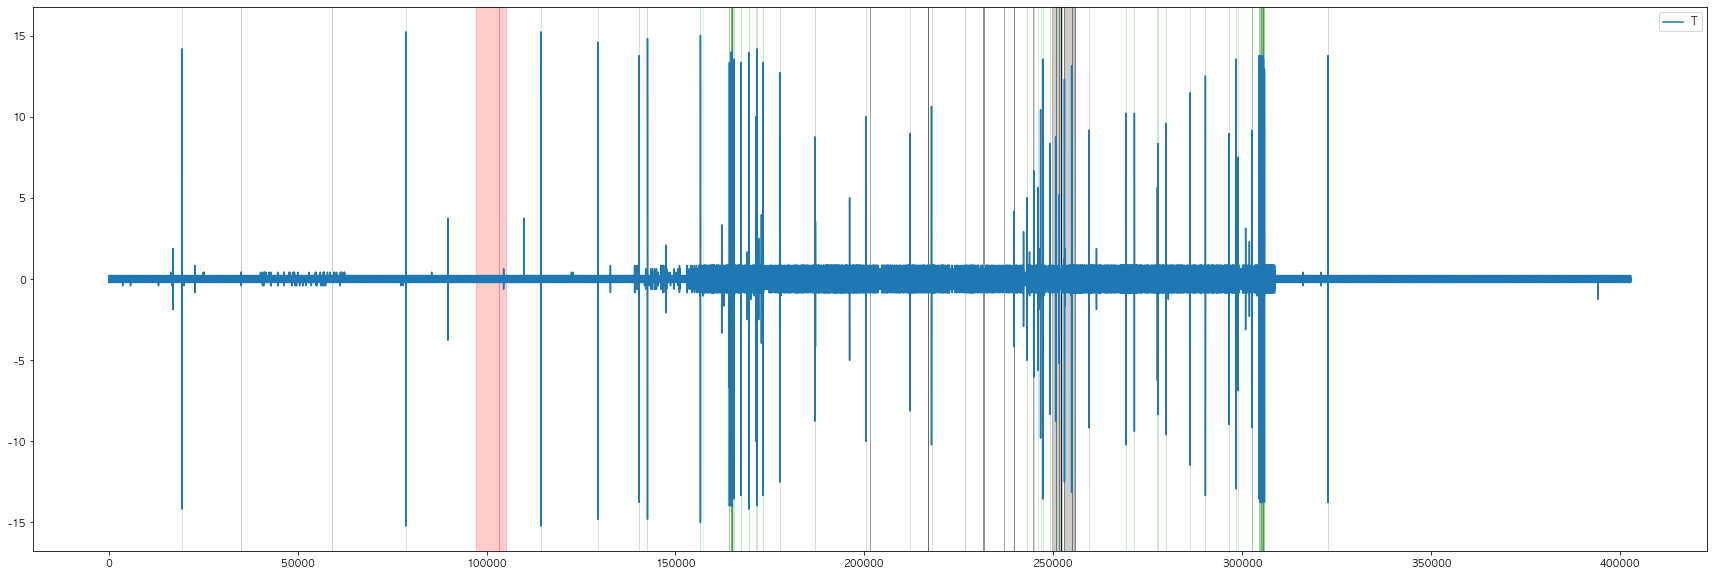

In [121]:
for i in list:
    plot_sensor(temp_df, i, "all")

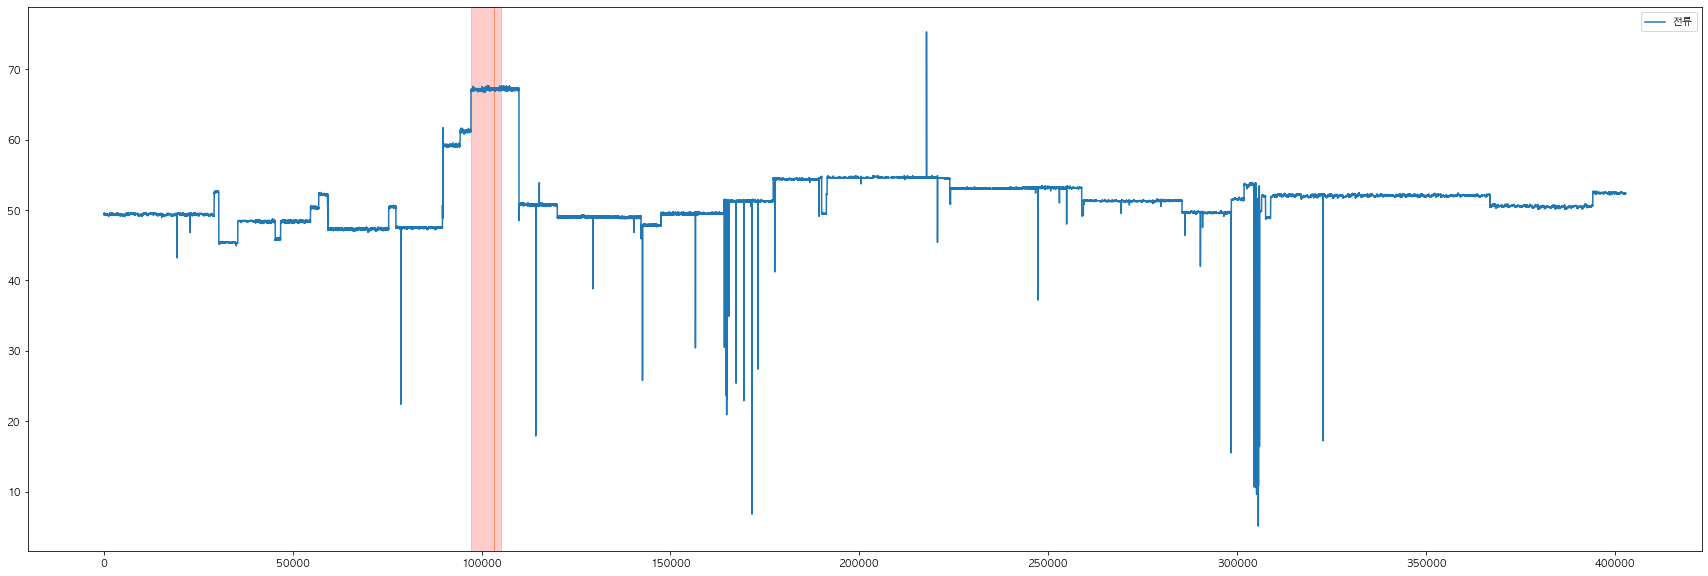

In [125]:
plot_sensor(d1re_1, '전류', "A")

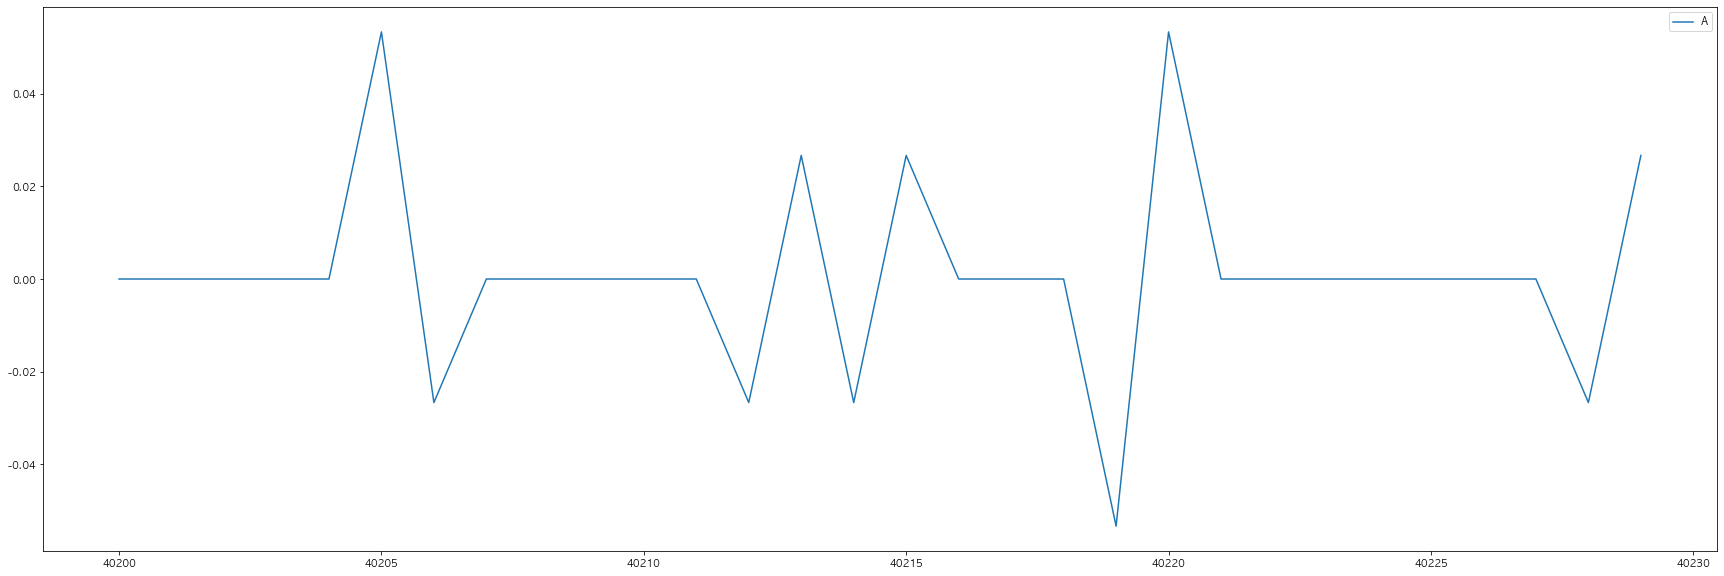

In [146]:
plot_sensor(temp_df[40200:40230], 'A', "A")

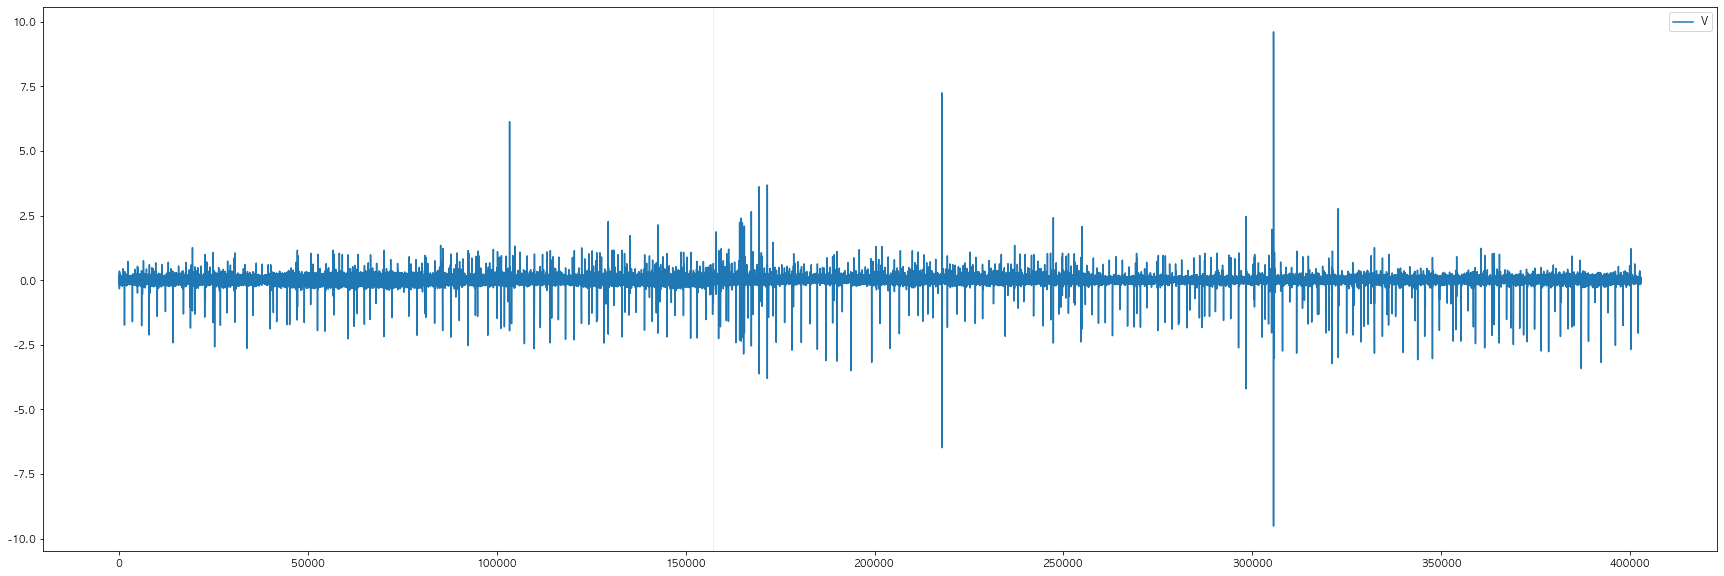

In [123]:
plot_sensor(temp_df, 'V', "V")

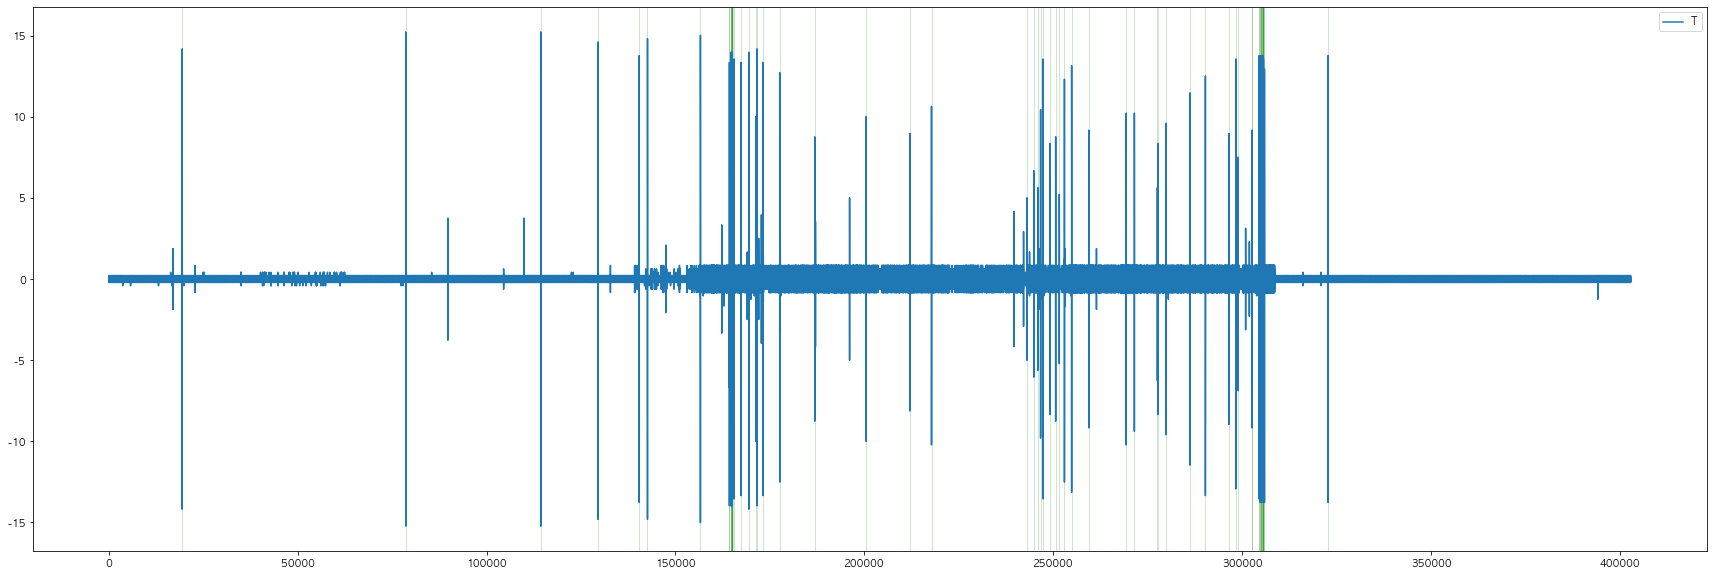

In [120]:
plot_sensor(temp_df, 'T', "T")

## 자기상관검정

In [164]:
#! pip install statsmodels
# UDF for ADF test
from statsmodels.tsa.stattools import adfuller
import pandas as pd


def adf_test(timeseries):
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)

In [ ]:
adf_test(temp_df['V'])

Results of Dickey-Fuller Test:


# time series clustering(미완)

In [3]:
# 패키지 로딩

from tslearn.clustering import TimeSeriesKMeans, KShape, KernelKMeans
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from am4894plots.plots import plot_lines, plot_lines_grid
from dateutil.parser import parse
import matplotlib as mpl

In [4]:
# 인덱싱

d1re_1.set_index('시간', inplace=True)
d1re_1.drop(['index', '공정명', '생산량', '판단', '팁누적개수',
            'NUM_EA', '모델명'], axis=1, inplace=True)

In [ ]:
df = d1re_1

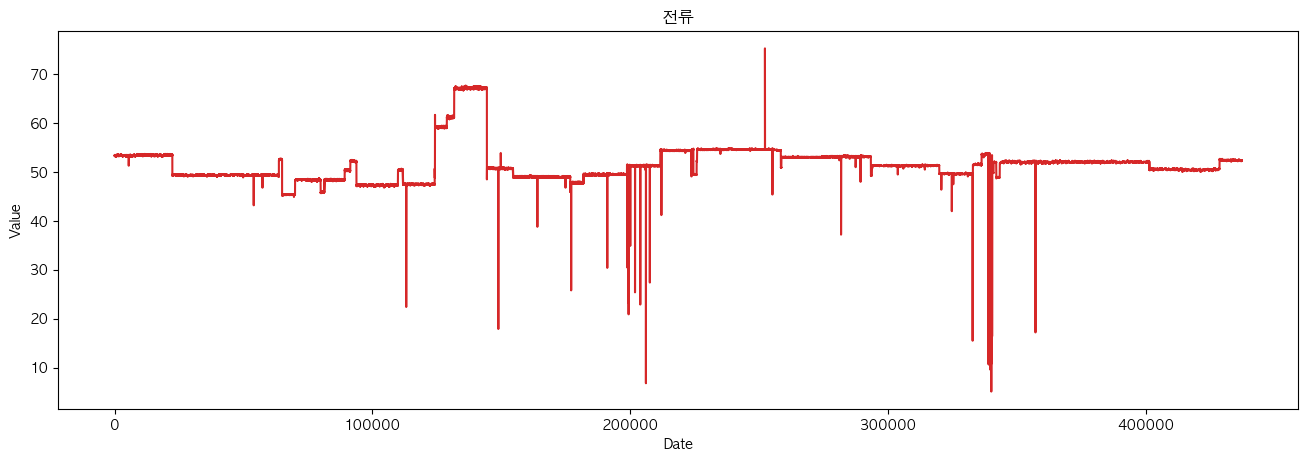

In [12]:
# 시계열 그래프 시각화

columnlist =


def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16, 5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()


plot_df(ddf x=df.index, y=d1re['전류'], title='전류')